# Main Natural Gas Indicators and Datasets in Canada 


## Importance of Energy Data

Energy information is essential to drive forward-looking decision by governments, industries, and Canadians.  It plays a key role in enhancing public confidence, competitiveness and the Government’s ability to support the low-carbon transition. 

## Overview of Energy Information in Canada

Energy information includes statistics, data, analysis and projections related to the production, transformation, distribution and consumption of energy; as well as the linkages between energy and the economy, society and environment. 

Canada's energy information system is a collective contribution of several organizations, including:
- four federal departments or agencies: 
    - Natural Resources Canada (__[link](https://www.nrcan.gc.ca/home)__);
    - Statistics Canada (__[link](https://www.statcan.gc.ca/eng/start)__);
    - Environment and Climate Change Canada (__[link](https://www.ec.gc.ca/?lang=En)__);
    - National Energy Board (__[link](https://www.neb-one.gc.ca/index-eng.html)__).
    - provincial and territorial government departments, regulators and utilities boards;
- energy market participants (ex. power producers, pipeline companies, system operators, etc.); 
- industry associations and academic research bodies; 
- Canada’ Open Government website (__[link]()__);

## Canadian Energy Information Hub

Although Canadian energy information is abundant, it can be difficult to navigate, interpret and verify, particularly for non-experts. Moreover, data measurement, definitions and reporting standards vary amongst information providers. Finally, data releases are often not timely, and lags are considered too long for a growing demand for real-time information. 

Recognizing the complexity of Canada’s current energy information system, in March 2019, the Government of Canada launched the Canadian Energy Information Hub. The Hub is a one stop shop for energy information that provides a single point of access for all federal-government statistics and provides links to existing body of energy information products. 

The Hub also contains Energy Information Indicators for major energy commodities, including natural gas (link to crude oil, electricity). 

## Goal of this notebook: 

The goal of this notebook is three-fold:
- 1) Identify the main datasets related to Canada’s natural gas market Energy Information Indicators;
- 2) Load the Indicator datasets into the notebook and provide an overview of key trends;
- 3) Provide links to other available datasets for more analysis;

__Data sets files are not provided to accompany the notebook. Rather, data is loaded directly into the notebook from the source provider. This ensures transparency, reproducibility and timeliness. Datasets used in this notebook come from multiple sources and are often not in flat, machine-readable formats. Also, measurement units between the datasets are not standardized.__

__To provide analytical value, data sets in the notebook are first transformed to ensure comparability and standardization. Datasets used in this notebook all come from free public sources.__

For units not available in this notebook, the National Energy Board offers a site with extensive energy conversion tables (__[link](https://apps.neb-one.gc.ca/Conversion/conversion-tables.aspx?GoCTemplateCulture=en-CA)__). 


In [24]:
#import the following libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
import zipfile
import io
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

## Energy Information Indicators - Natural Gas:

### Canadian Natural Gas Production

#### 1) Main dataset

Data on the production of natural gas is collecated by provinical governments and is used to assess the collection of royalties or support regulatory mandates. The NEB aggregates provincial government statistics and publishes the Marketable Natural Gas Production in Canada report (__[link](https://www.neb-one.gc.ca/nrg/sttstc/ntrlgs/stt/mrktblntrlgsprdctn-eng.html)__). Data is available since 2000 and is updated by the NEB monthly. Provincial government data may be delayed by up to 6 months.  

More specifically, the NEB aggregates the following province-level statistics:
- __Government of British Columbia__ - Production and distribution of Natural Gas in BC report (__[link](http://www2.gov.bc.ca/gov/content/industry/natural-gas-oil/statistics)__);

    _Marketable Production = Residue Gas plant outlet - BC production only_
    
    
- __Alberta Energy Regulator__ - ST3: Alberta Energy Resource Industries Monthly Statistics (__[link](https://aer.ca/providing-information/data-and-reports/statistical-reports/st3)__);

     _Marketable Production = Well Production + In Situ Well Production – flared – vented – shrinkage_ 
     
     
- __Government of Saskatchewan__  - Natural Gas Volume and Value Summary report (__[link](http://publications.gov.sk.ca/details.cfm?p=89506)__);

     _Marketable Production = Gas Available for Use or Sale_


- __Canada - Nova Scotia Offshore Petroleum Board__ - Monthly Production Summary report (__[link](http://www.cnsopb.ns.ca/offshore-activity/weekly-activity-reports)__);

    _Marketable Production = raw gas production * 92.5_


#### 2) Load dataset to notebook

In [25]:
#access data from the Marketable Natural Gas Production in Canada report (published by the National Energy Board)
NEB_natural_gas_production_url = 'https://www.neb-one.gc.ca/nrg/sttstc/ntrlgs/stt/mrktblntrlgsprdctn2018.xls'
pd.options.display.float_format = '{:,.2f}'.format
prod_df = pd.read_excel(NEB_natural_gas_production_url, sheet_name= '2000+ - cubic feet per day', 
                        usecols= [0,1,2,3,4,5,6,7,8], skiprows = 10, index_col=0, na_values = 'nan' )
prod_df.columns = ['Date','Nova Scotia', 'New Brunswick', 'Ontario', 'Saskatchewan', 'Alberta', 'British Columbia', 
                   'Territories']
columns = ['Nova Scotia', 'New Brunswick', 'Ontario', 'Saskatchewan', 'Alberta', 'British Columbia', 
                   'Territories']
prod_df = prod_df.iloc[:, 1:].divide(1000, axis = 0)

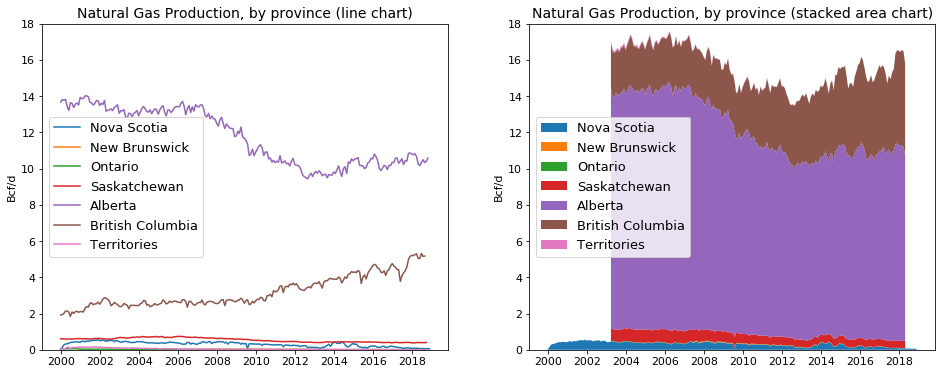

In [26]:
#Create charts
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16,6))
ax1.plot(prod_df[columns]) 
ax1.set_ylabel('Bcf/d', fontsize = 11)
ax1.set_title('Natural Gas Production, by province (line chart)', fontsize = 14)
ax1.legend(columns, fontsize = 13) 
ax1.set_ylim(0, 18)
ax1.tick_params(labelsize = 11)

ax2.stackplot(prod_df.index, prod_df[columns].T)
ax2.set_ylabel('Bcf/d', fontsize = 11)
ax2.set_title('Natural Gas Production, by province (stacked area chart)', fontsize = 14)
ax2.legend(columns, loc = 'center left', fontsize = 13) 
ax2.set_ylim(0, 18)
ax2.tick_params(labelsize = 11)

Canadian marketable natural gas production averaged 16.1 Bcf/d in 2018, an increase of 3 per cent over 2017. Alberta is the largest producer of natural gas in Canada, followed by British Columbia and Saskatchewan. Together, the three provinces produce 98 per cent of Canada's total production. Alberta's share of total production has decreased over the last ten years, as production in British Columbia increased.  

#### 3) Other datasets for Canadian natural gas production
Natural gas production statistics are also published by Statistics Canada in the supply and disposition of natural gas report (CANSIM Table 25-10-0055-01) (__[link](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501)__). This report employs a different methodology to calculate production of marketable gas compared to the NEB, and therefore the data between the two reports is not exact.

### Canadian Natural Gas Demand

#### 1) Main dataset
Data on natural gas demand in Canada is published by Statistics Canada in the supply and disposition of natural gas report
(CANSIM Table 25-10-0055-01) (__[link](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501)__). Monthly demand data is available for the residential, commerical and industrial sectors, by province. Data is lagged by approximately 3 months. 

#### 2) Load dataset to notebook

In [27]:
#access data from the supply and disposition of natural gas report published by Statistics Canada
url = 'https://www150.statcan.gc.ca/n1/tbl/csv/25100055-eng.zip'
r = requests.get(url, allow_redirects=True, stream = True)
zip_file = zipfile.ZipFile(io.BytesIO(r.content))
df = pd.read_csv(zip_file.open('25100055.csv'), low_memory=False, index_col=None, header=0, parse_dates=['REF_DATE'])

df['Bcf/d'] = df['VALUE']/(df['REF_DATE'].dt.daysinmonth)/1000000*35.3147
variables = df['Supply and disposition'].unique().tolist()[3:6]
df = df[df['Supply and disposition'].isin(variables)]
df = df[df['UOM'] == 'Cubic metres']
df = df.drop(df.columns[[2,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1)
df.columns = ['Date', 'Region', 'Category', 'Bcf/d']

demand_by_province = df[df['Region'] != 'Canada']
demand_by_province = demand_by_province.groupby(['Date', 'Region']).sum().reset_index()
demand_by_province = demand_by_province.pivot(index = 'Date', columns = 'Region')['Bcf/d'].reset_index()
demand_by_province = demand_by_province.set_index('Date')
provinces = demand_by_province.columns.tolist()

demand_by_category = df[df['Region'] == 'Canada']
demand_by_category = pd.pivot_table(demand_by_category, values = 'Bcf/d', columns = 'Category', index = ['Date', 'Region']).reset_index()
demand_by_category = demand_by_category.set_index('Date')
consumption_type = demand_by_category.columns.tolist()[1:]

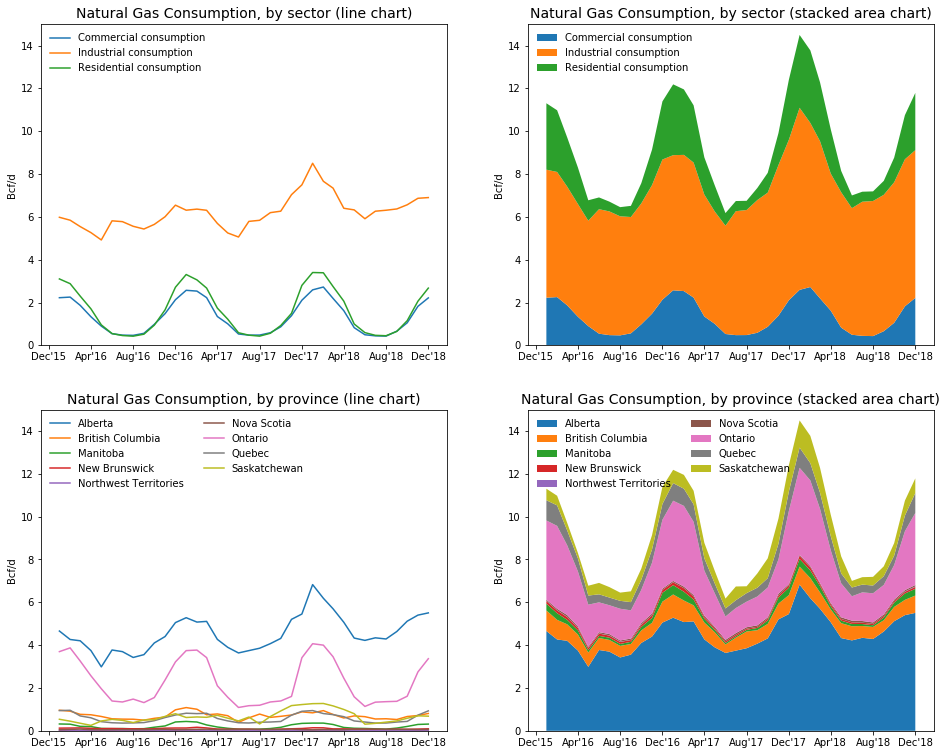

In [28]:
#create charts
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize=(16,13))#, sharey = True)
ax[0,0].plot(demand_by_category[consumption_type])
ax[0,0].legend(consumption_type, frameon = False, loc = 'upper left') 
ax[0,0].set_title('Natural Gas Consumption, by sector (line chart)', fontsize = 14)

ax[0,1].stackplot(demand_by_category.index, demand_by_category[consumption_type].T)
ax[0,1].legend(consumption_type, frameon = False, loc = 'upper left') 
ax[0,1].set_title('Natural Gas Consumption, by sector (stacked area chart)', fontsize = 14)

ax[1,0].plot(demand_by_province[provinces])
ax[1,0].legend(provinces, frameon = False, loc = 'upper left', ncol = 2) 
ax[1,0].set_title('Natural Gas Consumption, by province (line chart)', fontsize = 14)

ax[1,1].stackplot(demand_by_province.index, demand_by_province[provinces].T)
ax[1,1].legend(provinces, frameon = False, loc = 'upper left', ncol = 2) 
ax[1,1].set_title('Natural Gas Consumption, by province (stacked area chart)', fontsize = 14)

for x in ax.flat:
    x.xaxis.set_major_formatter(DateFormatter("%b'%y"))
    x.set_ylim(0, 15)
    x.set_ylabel('Bcf/d')

Canadian natural gas demand is seasonal. Demand is highest in the winter when natural gas is used for space heating. In January 2018, demand increased to 14.5 Bcf/d. In the summer, demand has averaged approximately 7 Bcf/d.  In general, for the last ten years, demand has been growing at a rate of X.X per cent per year. 

The largest natural gas user in Canada is the industrial sector, which includes industries such as crude oil production, petrochemicals, manufacturing and power production. Alberta is the largest user of natural gas, followed by Ontario and Saskatchewan. 

#### 3) Other datasets for Canadian natural gas demand
Daily data on total Canadian demand is not available, although paid-for research services may offer modelled daily demand projections. 

Canadian pipeline companies also publish daily gas day summary reports on their websites, which aggregate shippers' daily nominations between specific receipt and delivery points on their systems. Review of this data provides an indication of daily natural gas demand in a specific region. Major Canadian pipelines that provide gas day summary reports include: 
- TransCanada Mainline pipeline (__[link](http://www.tccustomerexpress.com/2878.html)__);
- Nova Gas Transmission pipeline (__[link](http://www.tccustomerexpress.com/2878.html)__);
- Westcoast pipeline (__[link](https://noms.wei-pipeline.com/customer-activities/pipeline.php)__);
- Union Gas pipeline (__[link](https://www.uniongas.com/storage-and-transportation/informational-postings/gas-day-summary)__);
- TransGas pipeline (__[link](https://www.transgas.com/infopostings/apps/DailyOpsDetail.aspx)__);

### Canadian Natural Gas Imports and Exports 

#### 1) Main dataset
Canada produces more natural gas than is requred for domestic consumption. Remaining natural gas is exported to the United States via pipelines. The National Energy Board regulates the imports and exports of natural gas and collects import and export statistics from pipeline shippers. This information is availble from the National Energy Board's Commodities Tracking System (__[link](https://apps.neb-one.gc.ca/CommodityStatistics/Statistics.aspx?language=english)__) and in flat format from Canada's Open Government website - Natural Gas Historical Summary by Port Volume - Exports (__[link](https://open.canada.ca/data/en/dataset/31853b86-2542-4450-ada7-46a94676cf61)__) and Natural Gas Historical Summary by Port Volume - Imports (__[link](https://open.canada.ca/data/en/dataset/78e5771b-ad53-45bc-955a-689cd9c69c61)__).

#### 2) Load dataset to notebook

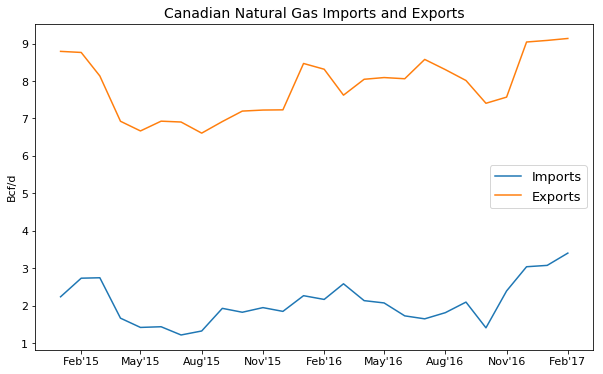

In [29]:
#to be revised when Open Gov is updated
#access Natural Gas Historical Summary by Port Volume - Imports 
imports = pd.read_csv('http://www.neb-one.gc.ca/open-ouvert/nrg/gshstrclsmmry/gshstrclsmmry_mprts_mnth_cdndllrs_eng.csv', 
                      encoding = 'unicode_escape')
imports['Date'] = pd.to_datetime(imports['Year'].astype(str) + imports['Month'], format = '%Y%B')
imports = imports.groupby('Date').sum().reset_index()
imports['Bcf/d'] = imports['Volume (10³ m³)'] * 35.3147 / imports['Date'].dt.daysinmonth /1000000
imports = imports.drop(imports.columns[[1,2]], axis = 1)
imports.columns = ['Date', 'Imports']

#access Natural Gas Historical Summary by Port Volume - Exports 
exports = pd.read_csv('http://www.neb-one.gc.ca/open-ouvert/nrg/gshstrclsmmry/gshstrclsmmry_xprts_mnth_cdndllrs_eng.csv', 
                      
                      encoding = 'unicode_escape')
exports['Date'] = pd.to_datetime(exports['Year'].astype(str) + exports['Month'], format = '%Y%B')
exports = exports.groupby('Date').sum().reset_index()
exports['Bcf/d'] = exports['Volume (10³ m³)'] * 35.3147 / exports['Date'].dt.daysinmonth /1000000
exports = exports.drop(exports.columns[[1,2]], axis = 1)
exports.columns = ['Date', 'Exports']

#merge imports and exports
df = pd.merge(imports, exports, on = 'Date')
df = df.set_index('Date')

#make chart
fig, ax = plt.subplots(ncols = 1, figsize=(10,6))
ax.plot(df[['Imports', 'Exports']])
ax.set_title('Canadian Natural Gas Imports and Exports', fontsize = 14)
ax.xaxis.set_major_formatter(DateFormatter("%b'%y"))
ax.legend(['Imports', 'Exports'], fontsize = 13) 
ax.set_ylabel('Bcf/d', fontsize = 11)
ax.tick_params(labelsize = 11)

#### 3) Other datasets for Canadian natural gas exports and imports

Natural gas import and export statistics are also published by Statistics Canada in the supply and disposition of natural gas report (CANSIM Table 25-10-0055-01) (__[link](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501)__). 

Data on imports and exports can also be found in the Canadian International Merchandise and Trade report (__[link](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=eng)__). This report aggregates imports and exports using internationally standardized Harmonized System (HS) codes, which are based on individual commodities. The HS code for natural gas is _271121_ (natural gas, in gaseous state). The HS code for liquified natural gas is _271111_ (natural gas, liquefied). Data is available monthly by country (and state in the case of the US); with an approximate lag of three months. 

Both of these report employs a different methodology to calculate imports and exports compared to the NEB, and therefore the data between the three reports is not always identical.

### Natural Gas Prices


#### 1) Main dataset
Natural gas is a globally traded commodity and has a highly developed and integrated market. Gas can be traded between buyers and sellers for an immediate or near-term delivery (for a spot price), or for a forward dateded delivery (for a futures price). Spot and futures prices may vary depending on immediate and future expectations of market conditions. 

Daily spot and futures prices for natural gas are available from the Energy Inforation Agency and are updated daily (__[link](https://www.eia.gov/dnav/ng/hist/rngc1d.htm)__).  

Alberta natural gas prices are published by the Government of Alberta (__[link](https://economicdashboard.alberta.ca/NaturalGasPrice)__).  

The National Energy Board also publishes monthly import and export prices.

#### 2) Load dataset to notebook

In [30]:
#access EIA NYMEX forward price
nymex_df = pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGC1d.xls', sheet_name= 'Data 1' , skiprows=2) 
nymex_df.columns = ['Date', 'US$/MMBtu']
nymex_df['Date'] = pd.to_datetime(nymex_df['Date'])

In [31]:
#access Alberta natural gas prices
alberta_prices_url = 'https://economicdashboard.alberta.ca/Download/DownloadFile?extension=csv&requestUrl=https%3A%2F%2Feconomicdashboard.alberta.ca%2Fapi%2FOilPrice'
alberta_prices_df = pd.read_csv(alberta_prices_url)
alberta_prices_df = alberta_prices_df[alberta_prices_df ['Type'] == 'NatGas']
alberta_prices_df['When'] = pd.to_datetime(alberta_prices_df['When'], format = '%m/%d/%Y %I:%M:%S %p')
alberta_prices_df = alberta_prices_df.drop(['Id', 'Type', 'Unit', 'ModifiedDate'], axis = 1)
alberta_prices_df.columns = ['Date', 'CA$/GJ']
# alberta_prices_df = alberta_prices_df.set_index('Date')
# alberta_prices_chart = alberta_prices_df.plot(kind = 'line')

#add NEB import/export prices once in Open Gov

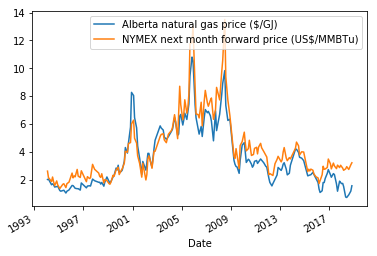

In [32]:
prices_df = pd.merge(alberta_prices_df, nymex_df, left_on='Date', right_on = 'Date')#, on='Date')
prices_df.tail()
prices_df.columns = ['Date', 'Alberta natural gas price ($/GJ)', 'NYMEX next month forward price (US$/MMBTu)']
prices_graph = prices_df.plot(kind = 'line', x = 'Date', y = ['Alberta natural gas price ($/GJ)' , 'NYMEX next month forward price (US$/MMBTu)'])

Due to the highly integrated nature of the Canadian and US markets, Canadian natural gas prices track US prices closely. Variance between the two markets is attributed to regional weather events, pipeline transportation costs and availability of pipeline capacity. 

In 2019, natural gas commodity prices are at historic lows, averaging below $2/GJ. These price levels are comparable to the 1990s (nominal dollars).

In general, natural gas prices are lower in British Columbia and Alberta, due to proximity of demand to supply sources, and higher in other provinces. The highest natural gas prices are in the Martimes provinces, due to limited availability and higher transportation costs. 

#### 3) Other datasets for Canadian natural gas prices

Natural gas price data is also available from provincial regulatory bodies or local natural gas distribution companies. Price data is filed to utilty regulators for approval and is contained in regulatory filings. However, the data is often not aggregated in a flat, machine-readable format; is differentiated by non-standardized customer classes which may make provincial comparisons difficult; and may be aggregated for different time periods (ex. monthly, quarterly) in each province. Data on natural gas prices in Canadian provinces comes from: 
- Alberta
    - Alberta Utilities Commission (__[link](http://www.auc.ab.ca/pages/current-rates-gas.aspx)__);
- British Columbia 
    - FortisBC (__[link](https://www.fortisbc.com/accounts-billing/billing-rates/natural-gas-rates/residential-rates)__);
- Saskatchewan
    - SaskEnergy (__[link](https://www.saskenergy.com/residential/resrates_hist.asp)__);
- Manitoba
    - The Public Utilities Board (__[link](http://www.pubmanitoba.ca/v1/regulated-utilities/natural-gas/rates/s_supply.html)__)
- Ontario
    - Ontario Energy Board (__[link](https://www.oeb.ca/rates-and-your-bill/natural-gas-rates)__);
- Quebec
- New Brunswick
    - Enbridge Gas New Brunswick (__[link](https://naturalgasnb.com/en/for-home/accounts-billing/our-product-offering/#eug-rate-history)__);
- Nova Scotia 
    - Heritage Gas (__[link](http://www.heritagegas.com/natural-gas/historical-rates/)__);

### Forecast for Natural Gas Supply and Demand

#### 1) Main dataset
The National Energy Board publishes the Energy Futures report (__[link](http://apps.neb-one.gc.ca/nrg/ntgrtd/ftr/2016/index-eng.html)__) - a projection of Canadian energy supply and demand to 2040. The report includes projections for supply and demand of natural gas. Projections are modeled based on historical data, and include a series of policy, technology and market assumptions outlined in the report. The report provides data appendices (__[link](https://apps.neb-one.gc.ca/ftrppndc/dflt.aspx?GoCTemplateCulture=en-CA)__) and interactive vizualizations (__[link]()__) to further explore Canada's energy future. The latest Energy Futures report was published in November 2018.

#### 2) Load dataset to notebook

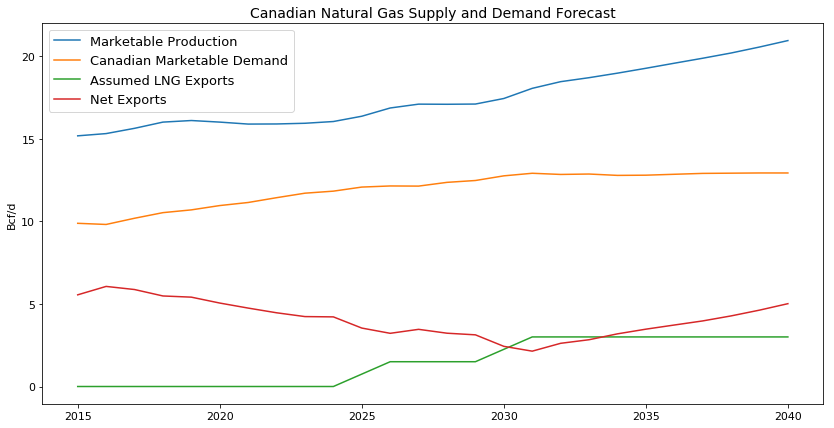

In [33]:
#access data 
df = pd.read_excel('https://www.neb-one.gc.ca/nrg/ntgrtd/ftr/2018/fgrs-eng.xlsx', sheet_name= '3.19', header = 2, index_col=0).T
df_columns = df.columns

#make chart
fig, ax = plt.subplots(ncols = 1, figsize=(14,7))
ax.plot(df[df_columns])
ax.set_title('Canadian Natural Gas Supply and Demand Forecast', fontsize = 14)
ax.legend(df_columns, fontsize = 13) 
ax.set_ylabel('Bcf/d', fontsize = 11)
ax.tick_params(labelsize = 11)

The report forecasts natural gas production to increase at a rate of X.X per cent per year and average 20.9 Bcf/d, an increase of X per cent from the 2018. Natural gas demand is forecast to increase at a rate of X.X per cent per year and average 12.9 Bcf/d, an increase of X per cent from the 2018. For the first time ever, the Energy Futures report also forecasts exports of liquefied natural gas to commence in 2026, increasing to 3.8 Bcf/d by 2040. 


The Energy Futures report also provides a provincial breakdown of the supply forecast by province.

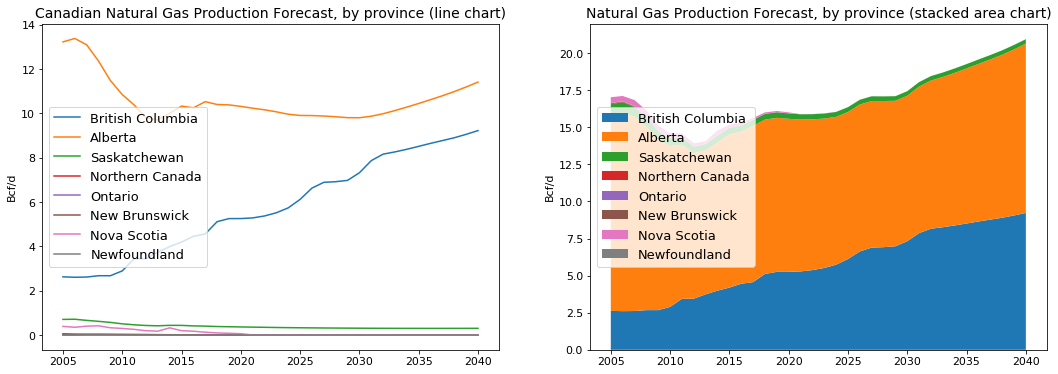

In [34]:
# access data
df = pd.read_excel('https://www.neb-one.gc.ca/nrg/ntgrtd/ftr/2018/fgrs-eng.xlsx',  sheet_name= '3.17', header=2, 
                   index_col=0)
# df = pd.read_excel('fgrs-eng.xlsx', sheet_name= '3.17', header=2, index_col=0)
efcolumns = df.columns

#make chart
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
ax1.plot(df[efcolumns]) 
ax1.set_ylabel('Bcf/d', fontsize = 11)
ax1.set_title('Canadian Natural Gas Production Forecast, by province (line chart)', fontsize = 14)
ax1.legend(efcolumns, fontsize = 13) 
ax1.tick_params(labelsize = 11)

ax2.stackplot(df.index, df[efcolumns].T)
ax2.set_ylabel('Bcf/d', fontsize = 11)
ax2.set_title('Natural Gas Production Forecast, by province (stacked area chart)', fontsize = 14)
ax2.legend(efcolumns, loc = 'center left', fontsize = 13) 
# ax2.set_ylim(0, 18)
ax2.tick_params(labelsize = 11)

plt.show()

Canada's natural gas supply is projected to come primarily from two provinces - Alberta and British Columbia. Alberta' production is forecast to average 11.7 Bcf/d in 2040. British Columbia's natural gas production is forecast to more than double from today, to average 9.2 Bcf/d in 2040. Saskatchewan's production is forecast to remain steady throughput the projection period, averaging 0.3 Bcf/d in 2040. 

#### 3) Other datasets for Canadian natural gas supply and demand forecast
Energy Futures is the only government-published report on Canadian energy supply and demand projections at the federal level. Provincial governments also publish provincial-level supply and demand projections. These inlcude:
- Alberta Energy Regulator's ST98 Report (__[link](https://www.aer.ca/providing-information/data-and-reports/statistical-reports/st98)__);

At the international level, other government, non-government and corporate bodies also publish global energy supply and demand statistics, which includes Canada. These include:
- US Energy Information Administration's International Energy Outlook 2018 (__[link](https://www.eia.gov/outlooks/ieo/)__);
- International Energy Agency World Energy Outlook (__[link](https://www.iea.org/weo/)__);
- BP Energy Outlook (__[link](https://www.bp.com/en/global/corporate/energy-economics/energy-outlook.html)__).

## Additional Resources
Please see the Canadian Energy Information Inventory (__[link](https://public.tableau.com/profile/energy.markets#!/vizhome/CanadianEnergyInformationInventoryCEII-V2_0/Datasets)__) - a government maintained searchable database for energy-related information and datasets in Canada. The CEII contains url links to over 200 datasets related to energy use and production in Canada and is searchable by issuer, commodity and category.

All the datasets used in this notebook are listed in the CEII. To provide feedback on the CEII, please email CEII-ICIE@neb-one.gc.ca.
